# Análise do Data Warehouse - (Cursos Superior, Cor/Raça, IFPB)

Análise dos dados disponibilizados no Data Warehouse



**Instalando o Cassandra no Jupyter**

`docker-compose exec jupyter pip install cassandra-driver`

## Imports

In [1]:
#Imports
from time import sleep

In [2]:
#Imports Cassandra
from cassandra.auth import PlainTextAuthProvider
from cassandra.cluster import Cluster

In [3]:
#Imports Pandas
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

## Conexão ao banco de Dados Cassandra

In [4]:
#Conectando a seção
ap = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(['cassandra'], protocol_version=4, auth_provider=ap)
session = cluster.connect('alunos')
session.default_timeout = 60
session.row_factory = pandas_factory
sleep(2)

## Consulta

In [5]:
table = 'fato_aluno_sexo'
field = 'sexo'
curse_types = ['Bacharelado','Licenciatura','Tecnologia']
filters = {    
    'categoria_situacao': ['Evadidos','Concluintes'],
    'unidade_ensino': '',
    'instituicao': 'IFPB',
}

In [6]:
s = []
for k, v in filters.items():
    if v :
        if type(v) is str:
            s.append("({} = '{}')".format(k,v))
        elif type(v) is list:
            s.append("({} IN ({}))".format(
                k,
                ','.join(map(str,["'{}'".format(i) for i in v]))))
filter_sql = " AND ".join(map(str,s))

In [7]:
# Análise de Sexo
sql = "SELECT categoria_situacao, {0}, tipo_curso, instituicao, unidade_ensino, sum(quant_grupo) AS quant_grupo" \
" FROM {1} " \
" WHERE {2} " \
" GROUP BY categoria_situacao, {0}, tipo_curso, instituicao " \
" ALLOW FILTERING;".format(
    field, 
    table,
    filter_sql)
rslt = session.execute(sql, timeout=None)
df = rslt._current_rows
df

,categoria_situacao,sexo,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,Feminino,Bacharelado,IFPB,Campus Cajazeiras,100
1,Concluintes,Feminino,Especialização (Lato Sensu),IFPB,Campus João Pessoa,112
2,Concluintes,Feminino,Licenciatura,IFPB,Campus Cajazeiras,116
3,Concluintes,Feminino,Mestrado,IFPB,Campus João Pessoa,6
4,Concluintes,Feminino,Qualificação Profissional (FIC),IFPB,Campus Avançado Areia,714
5,Concluintes,Feminino,Tecnologia,IFPB,Campus Cabedelo,320
6,Concluintes,Feminino,Técnico,IFPB,Campus Avançado Areia,1540
7,Concluintes,Masculino,Bacharelado,IFPB,Campus Cajazeiras,132
8,Concluintes,Masculino,Especialização (Lato Sensu),IFPB,Campus Cajazeiras,81
9,Concluintes,Masculino,Licenciatura,IFPB,Campus Cabedelo,122


## Filtrando Tipo do Curso

In [8]:
if curse_types :
    df = df[df['tipo_curso'].isin(curse_types)]
    print('Fitrando pelos tipos de cursos:\n {}'.format(', '.join(map(str,curse_types))))
    
else:
    print('Todos os cursos')
df

Fitrando pelos tipos de cursos:
 Bacharelado, Licenciatura, Tecnologia


,categoria_situacao,sexo,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,Feminino,Bacharelado,IFPB,Campus Cajazeiras,100
2,Concluintes,Feminino,Licenciatura,IFPB,Campus Cajazeiras,116
5,Concluintes,Feminino,Tecnologia,IFPB,Campus Cabedelo,320
7,Concluintes,Masculino,Bacharelado,IFPB,Campus Cajazeiras,132
9,Concluintes,Masculino,Licenciatura,IFPB,Campus Cabedelo,122
12,Concluintes,Masculino,Tecnologia,IFPB,Campus Cabedelo,586
14,Evadidos,Feminino,Bacharelado,IFPB,Campus Cajazeiras,103
16,Evadidos,Feminino,Licenciatura,IFPB,Campus Cabedelo,392
20,Evadidos,Feminino,Tecnologia,IFPB,Campus Cabedelo,604
22,Evadidos,Masculino,Bacharelado,IFPB,Campus Cajazeiras,226


## Agrupando

In [9]:
df = df.groupby(['categoria_situacao',field]).sum('quant_grupo').reset_index()

<AxesSubplot:xlabel='sexo'>

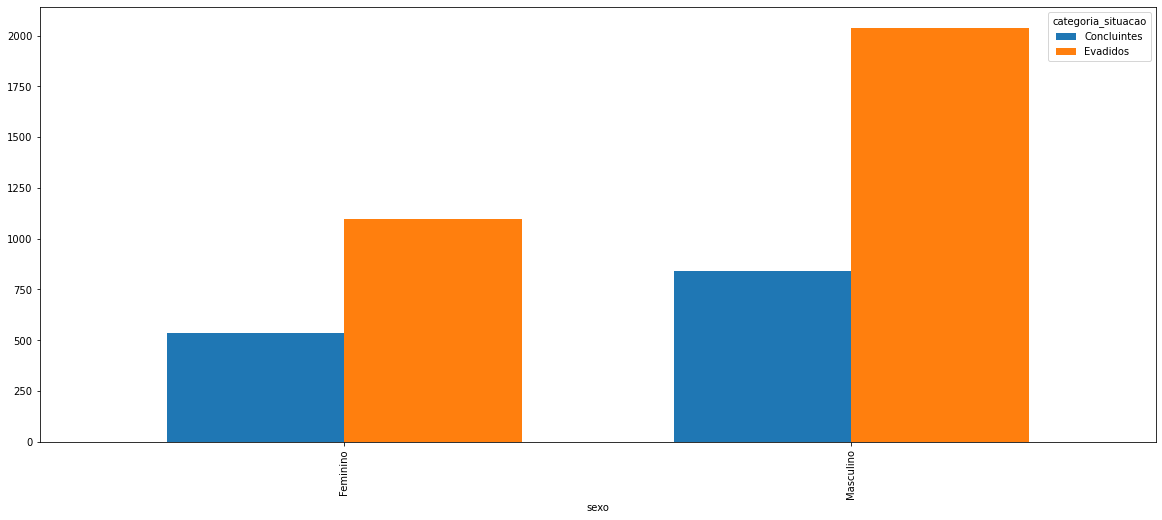

In [10]:
x = df.pivot_table('quant_grupo',[field],'categoria_situacao')
#x = df.pivot_table('quant_grupo',['categoria_situacao'],field)
x.plot(kind ='bar', figsize=(20, 8), width = 0.7)

## Total de Alunos

In [11]:
#df[field]
df.groupby([field]).sum('quant_grupo')['quant_grupo']

sexo
Feminino     1635
Masculino    2879
Name: quant_grupo, dtype: int64

In [12]:
print("Total de aluns: {:,}".format(df['quant_grupo'].sum()).replace(',','.'))

Total de aluns: 4.514
